**Halloween is a night of costumes, fun, and candy that takes place every year on October 31. On this day people dress up in various costumes that have a scary overtone and go trick-or-treating to gather candy.
This year, on Halloween, there is a carnival in your neighborhood. Besides the various games, there are also 50 stalls that are selling various products, which fall under various categories.
Your task is to predict the selling price of the products**

In [1856]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score

In [1857]:
import os

file_path = r"C:\GreatLearning\Pracs\dataset\train.csv"
file_path1 = r"C:\GreatLearning\Pracs\dataset\test.csv"

# Check if file exists
if not os.path.exists(file_path):
    print(f"Error: File not found at {file_path}")
else:
    import pandas as pd
    # Load the Excel file
    train = pd.read_csv(file_path)
if not os.path.exists(file_path1):
    print(f"Error: File not found at {file_path}")
else:
    import pandas as pd
    # Load the Excel file
    test = pd.read_csv(file_path1)


In [1858]:
train.head(5)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [1859]:
train.rename(columns={'charges_2 (%)':'charges_2'},inplace=True)
test.rename(columns={'charges_2 (%)':'charges_2'},inplace=True)

In [1860]:
train.dtypes

Product_id           object
Stall_no            float64
instock_date         object
Market_Category       int64
Customer_name        object
Loyalty_customer     object
Product_Category     object
Grade                 int64
Demand                int64
Discount_avail      float64
charges_1           float64
charges_2           float64
Minimum_price       float64
Maximum_price       float64
Selling_Price       float64
dtype: object

In [1861]:
train.Stall_no = train.Stall_no.astype('category')
train.Discount_avail = train.Discount_avail.astype('category')

In [1862]:
train.describe(include='all')

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2,Minimum_price,Maximum_price,Selling_Price
count,6368,6363.0,6368,6368.000000,6157,6368,6368,6368.000000,6368.000000,6330.0,6170.000000,6163.000000,6330.000000,6025.000000,6327.000000
unique,6368,50.0,5350,NaN,5900,2,10,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
top,BRAE2NF6JA5GUEXG,20.0,2015-09-22 15:24:59.000,NaN,Kennedy,Yes,Pet_care,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
freq,1,165.0,6,NaN,2,3887,682,NaN,NaN,5441.0,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,199.340609,NaN,NaN,NaN,0.643687,50.921168,NaN,264.514100,10.146195,3531.349763,6432.545892,4563.242592
std,NaN,NaN,NaN,170.275570,NaN,NaN,NaN,1.025092,29.091922,NaN,124.483056,4.318339,2194.729604,3716.177364,2979.102408
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,1.000000,NaN,100.000000,1.000000,1.000000,404.000000,-6062.470000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,0.000000,26.000000,NaN,163.000000,7.000000,1879.250000,3918.000000,2450.005280
50%,NaN,NaN,NaN,132.000000,NaN,NaN,NaN,0.000000,51.000000,NaN,252.000000,10.000000,3157.500000,5634.000000,4210.384640
75%,NaN,NaN,NaN,403.000000,NaN,NaN,NaN,2.000000,76.000000,NaN,314.000000,14.000000,4697.000000,8126.000000,6167.643252


In [1863]:
train = train.drop(columns = 'Product_id')
test = test.drop(columns = 'Product_id')

In [1864]:
train['istrain']=1
test['istrain']=0

In [1865]:
train.shape,test.shape

((6368, 15), (3430, 14))

In [1866]:
train.Selling_Price.fillna(train.Selling_Price.median(),inplace=True)
train = train[train.Selling_Price>=0]
train['charges_1'].fillna(train.charges_1.median(),inplace=True)
train['charges_2'].fillna(train.charges_2.median(),inplace=True)

In [1867]:
df = pd.concat([train,test])
df.head()

,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2,Minimum_price,Maximum_price,Selling_Price,istrain
0,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,1
1,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,1
2,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,1
3,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,1
4,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,1


In [1868]:
df.instock_date = pd.to_datetime(df.instock_date)
df['year'] = df.instock_date.dt.year
df['month'] = df.instock_date.dt.month
df['month'] = df.month.astype('category')
df['year'] = df.year.astype('category')

In [1869]:
df.Stall_no = df.Stall_no.astype('category')

In [1870]:
train.isnull().sum()

Stall_no              5
instock_date          0
Market_Category       0
Customer_name       210
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1             0
charges_2             0
Minimum_price        38
Maximum_price       342
Selling_Price         0
istrain               0
dtype: int64

In [1871]:
test.isnull().sum()

Stall_no             1
instock_date         0
Market_Category      0
Customer_name       53
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1           36
charges_2            5
Minimum_price       14
Maximum_price        0
istrain              0
dtype: int64

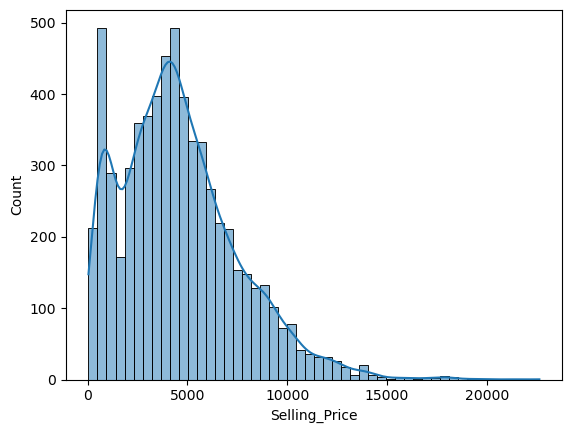

In [1872]:
sns.histplot(x=train.Selling_Price,kde=True,bins=50)
plt.show()

In [1873]:
df.Customer_name.fillna('Unknown',inplace=True)
df.Stall_no.fillna(20,inplace=True)
df.Discount_avail.fillna(0.0,inplace=True)
df.Maximum_price.fillna(df.Maximum_price.median(),inplace=True)
df.Minimum_price.fillna(df.Minimum_price.median(),inplace=True)
df.charges_1.fillna(df.charges_1.median(),inplace=True)
df.charges_2.fillna(df.charges_2.median(),inplace=True)

In [1874]:
train.describe()

,Market_Category,Grade,Demand,charges_1,charges_2,Minimum_price,Maximum_price,Selling_Price,istrain
count,6354.00000,6354.000000,6354.000000,6354.000000,6354.000000,6316.000000,6012.000000,6354.000000,6354.0
mean,199.30469,0.644476,50.932326,264.152660,10.141171,3532.459943,6434.452927,4579.565566,1.0
std,170.25998,1.025557,29.087207,122.593518,4.246727,2196.453788,3719.332693,2945.207968,0.0
min,0.00000,0.000000,1.000000,100.000000,1.000000,1.000000,404.000000,36.000000,1.0
25%,55.00000,0.000000,26.000000,166.000000,7.000000,1878.750000,3917.000000,2481.573951,1.0
50%,132.00000,0.000000,51.000000,252.000000,10.000000,3158.500000,5634.500000,4210.384640,1.0
75%,403.00000,2.000000,76.000000,309.750000,14.000000,4704.500000,8129.000000,6158.314200,1.0
max,471.00000,3.000000,100.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941,1.0


In [1875]:
negs = [c for c in train.columns if train[c].isna().sum()>0]
negs

['Stall_no',
 'Customer_name',
 'Discount_avail',
 'Minimum_price',
 'Maximum_price']

In [1876]:
df.isna().sum()

Stall_no               0
instock_date           0
Market_Category        0
Customer_name          0
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail         0
charges_1              0
charges_2              0
Minimum_price          0
Maximum_price          0
Selling_Price       3430
istrain                0
year                   0
month                  0
dtype: int64

In [1877]:
df.shape

(9784, 17)

In [1878]:
df = df.drop('instock_date',axis=1)

In [1879]:
num_vars = df.select_dtypes(np.number)
cat_vars = df.select_dtypes(exclude = np.number)
print ("There are {} numeric and {} categorical columns in train data".format(num_vars.shape[1],cat_vars.shape[1]))

There are 10 numeric and 6 categorical columns in train data


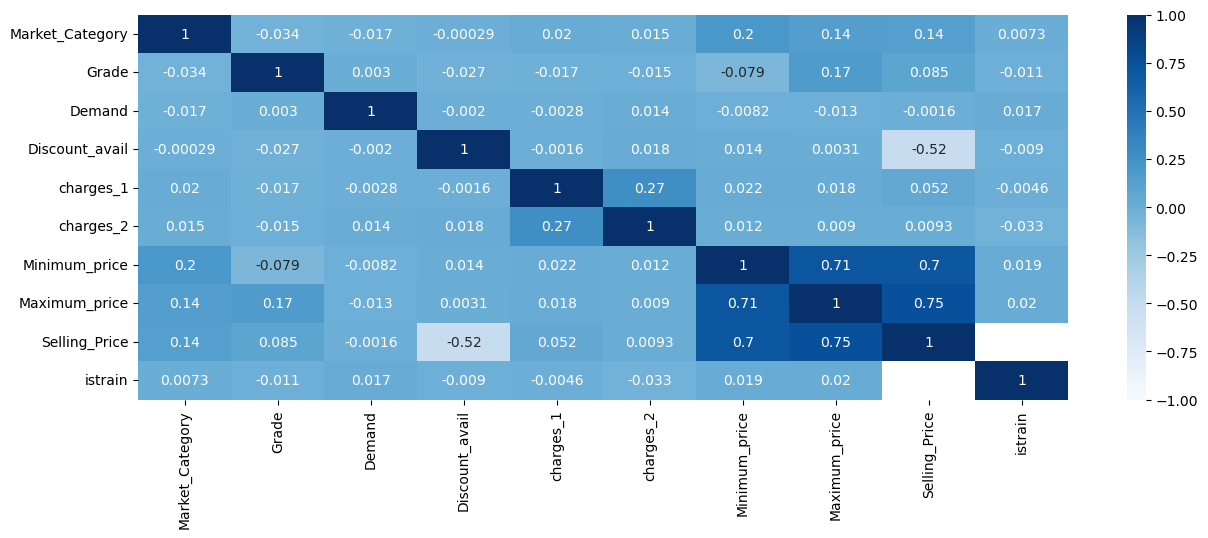

In [1880]:
plt.figure(figsize=(15,5))
sns.heatmap(num_vars.corr(),annot=True,vmin=-1,vmax=1,cmap='Blues')
plt.show()

In [1881]:
train_new = df[df.Selling_Price.notnull()].drop(columns='istrain')
X_test = df[df.Selling_Price.isnull()].drop(columns=['istrain','Selling_Price'])

In [1882]:
test.shape

(3430, 14)

In [1883]:
train_new.shape,X_test.shape,df.shape

((6354, 15), (3430, 14), (9784, 16))

In [1884]:
## categorical features significance 

In [1885]:
df.isna().sum()

Stall_no               0
Market_Category        0
Customer_name          0
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail         0
charges_1              0
charges_2              0
Minimum_price          0
Maximum_price          0
Selling_Price       3430
istrain                0
year                   0
month                  0
dtype: int64

In [1886]:
model = LinearRegression()
scaler =StandardScaler()
encoder = LabelEncoder()

In [1887]:
X_train=train_new.drop('Selling_Price',axis=1)
y_train=train_new['Selling_Price']

In [1888]:
y_train = np.log(y_train)
y_train

0       8.339488
1       9.134699
2       8.822573
3       9.474927
4       6.809651
          ...   
6363    9.237714
6364    8.412241
6365    9.231992
6366    8.586625
6367    8.560255
Name: Selling_Price, Length: 6354, dtype: float64

In [1889]:
nums = [c for c in train_new.columns if train_new[c].dtype not in ['object','category']]
cats = [c for c in train_new.columns if train_new[c].dtype in ['object','category']]

In [1890]:
train_new.Customer_name = encoder.fit_transform(train_new.Customer_name)

In [1891]:
X_test.Customer_name = encoder.fit_transform(X_test.Customer_name)

In [1892]:
encoded = pd.get_dummies(train_new,columns=[c for c in train_new.select_dtypes(exclude=np.number)],drop_first=True)
encoded

,Market_Category,Customer_name,Grade,Demand,Discount_avail,charges_1,charges_2,Minimum_price,Maximum_price,Selling_Price,Stall_no_2.0,Stall_no_3.0,Stall_no_4.0,Stall_no_5.0,Stall_no_6.0,Stall_no_7.0,Stall_no_8.0,Stall_no_9.0,Stall_no_10.0,Stall_no_11.0,Stall_no_12.0,Stall_no_13.0,Stall_no_14.0,Stall_no_15.0,Stall_no_16.0,Stall_no_17.0,Stall_no_18.0,Stall_no_19.0,Stall_no_20.0,Stall_no_21.0,Stall_no_22.0,Stall_no_23.0,Stall_no_24.0,Stall_no_25.0,Stall_no_26.0,Stall_no_27.0,Stall_no_28.0,Stall_no_29.0,Stall_no_30.0,Stall_no_31.0,Stall_no_32.0,Stall_no_33.0,Stall_no_34.0,Stall_no_35.0,Stall_no_36.0,Stall_no_37.0,Stall_no_38.0,Stall_no_39.0,Stall_no_40.0,Stall_no_41.0,Stall_no_42.0,Stall_no_43.0,Stall_no_44.0,Stall_no_45.0,Stall_no_46.0,Stall_no_47.0,Stall_no_48.0,Stall_no_49.0,Stall_no_50.0,Loyalty_customer_Yes,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,Product_Category_Repair,Product_Category_Technology,year_2015,year_2016,month_2,month_3,month_4,month_5,month_7,month_8,month_9,month_10,month_11,month_12
0,2,3721,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
1,24,3440,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
2,447,4810,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
3,23,67,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
4,63,1751,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6363,24,4048,0,47,0.0,614.0,10.0,8174.0,11266.0,10277.520192,False,False,False,False,False,False,False,False,False,False,Fal

In [1893]:
encoded_test = pd.get_dummies(X_test,columns=[c for c in X_test.select_dtypes(exclude=np.number)],drop_first=True)

In [1894]:
scaled_train = pd.DataFrame(scaler.fit_transform(X_train.drop('Customer_name',axis=1).select_dtypes(np.number)),columns=X_train.drop('Customer_name',axis=1).select_dtypes(np.number).columns)

In [1895]:
scaled_test = pd.DataFrame(scaler.fit_transform(X_test.drop('Customer_name',axis=1).select_dtypes(np.number)),columns=X_test.drop('Customer_name',axis=1).select_dtypes(np.number).columns)

In [1896]:
scaled_train.head(4)

,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2,Minimum_price,Maximum_price
0,-1.158935,0.346692,0.586822,-0.403062,0.912415,0.202249,-0.249788,-0.462114
1,-1.029710,-0.628465,0.002327,-0.403062,1.083726,0.437743,1.810553,1.094345
2,1.454921,-0.628465,-1.407339,-0.403062,-0.115453,-0.268739,1.014637,0.254426
3,-1.035584,1.321849,-0.100819,-0.403062,-0.980167,0.673237,0.712344,3.982033


In [1897]:
scaled_test.head(4)

,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2,Minimum_price,Maximum_price
0,0.049205,-0.638423,1.402318,-0.414063,0.919789,1.315869,-0.398804,-0.809427
1,-1.147422,-0.638423,1.297360,-0.414063,1.024077,1.315869,-1.030893,-1.196791
2,-0.081121,1.274058,0.177815,-0.414063,1.826289,-0.339481,1.716898,2.651679
3,0.955560,2.230299,1.262374,-0.414063,0.302086,1.315869,0.902176,1.914149


In [1898]:
X_train_new = scaled_train.join(encoded.drop(columns = [c for c in scaled_train.columns]).reset_index(drop=True)).drop('Selling_Price',axis=1)

In [1899]:
X_train_new.shape

(6354, 80)

In [1900]:
X_test_new = scaled_test.join(encoded_test.drop(columns = [c for c in scaled_test.columns]).reset_index(drop=True))

In [1901]:
X_test_new.shape

(3430, 80)

In [1902]:
model.fit(X_train_new,y_train)

LinearRegression()

In [1905]:
X_train,X_val,y_train,y_val = train_test_split(X_train_new,y_train,test_size=0.2,random_state=1)

In [1906]:
model.fit(X_train,y_train)
y_val_pred = model.predict(X_val)
y_val_pred

array([9.58333477, 7.87965643, 8.5471603 , ..., 8.47555812, 8.77292442,
       8.28415802])

In [1907]:
rsme = np.sqrt(mae(y_val,y_val_pred))
rsme

0.3741176142849292

In [1908]:
r2s = r2(y_val,y_val_pred)
r2s

0.921915163471243

In [1916]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
print(f"Cross-validated R2 scores: {scores}")

Cross-validated R2 scores: [0.89847004 0.9158862  0.942563   0.91781727 0.91228446]
